In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('car_evaluation.csv')

In [4]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
col_names = ['buying', 'maint', 'doors','persons', 'lug_boot', 'safety', 'class']

In [7]:
df.columns = col_names

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df.describe().T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [10]:
for col in col_names:
    print(df[col].value_counts)

<bound method IndexOpsMixin.value_counts of 0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1722      low
1723      low
1724      low
1725      low
1726      low
Name: buying, Length: 1727, dtype: object>
<bound method IndexOpsMixin.value_counts of 0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1722      low
1723      low
1724      low
1725      low
1726      low
Name: maint, Length: 1727, dtype: object>
<bound method IndexOpsMixin.value_counts of 0           2
1           2
2           2
3           2
4           2
        ...  
1722    5more
1723    5more
1724    5more
1725    5more
1726    5more
Name: doors, Length: 1727, dtype: object>
<bound method IndexOpsMixin.value_counts of 0          2
1          2
2          2
3          2
4          2
        ... 
1722    more
1723    more
1724    more
1725    more
1726    more
Name: persons, Length: 1727, dtype: object>
<bound method IndexOpsMixin.value_counts of 0   

In [11]:
df[df.duplicated()]

,buying,maint,doors,persons,lug_boot,safety,class


In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['buying'] = oe.fit_transform(df[['buying']])
df['maint'] = oe.fit_transform(df[['maint']])
df['persons'] = oe.fit_transform(df[['persons']])
df['doors'] = oe.fit_transform(df[['doors']])
df['lug_boot'] = oe.fit_transform(df[['lug_boot']])
df['safety'] = oe.fit_transform(df[['buying']])
df['class'] = oe.fit_transform(df[['class']])

In [13]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,3.0,2.0
1,3.0,3.0,0.0,0.0,2.0,3.0,2.0
2,3.0,3.0,0.0,0.0,1.0,3.0,2.0
3,3.0,3.0,0.0,0.0,1.0,3.0,2.0
4,3.0,3.0,0.0,0.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,1.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,1.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,1.0


In [16]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
pred1 = clf1.predict(X_test)
pred1

array([2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2., 2., 0., 2.,
       2., 0., 2., 1., 2., 0., 0., 2., 2., 0., 2., 2., 2., 1., 0., 1., 0.,
       2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 1., 2., 2., 0., 0., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 0., 0., 0., 2., 2., 2., 0., 2., 2., 2., 0., 2., 0., 2.,
       0., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2.,
       3., 0., 2., 2., 2., 0., 0., 2., 2., 2., 2., 0., 2., 2., 0., 2., 1.,
       2., 2., 2., 0., 2., 2., 2., 2., 0., 3., 2., 0., 0., 0., 1., 2., 2.,
       2., 1., 2., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 0., 1.,
       2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 0., 2., 2., 0.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 0., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 0., 2., 2., 2., 0., 0., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 2., 2., 2., 0., 2., 2., 3.,
       0., 2., 2., 2., 2.

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred1, y_test))

0.630057803468208


In [22]:
!pip install yellowbrick


  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


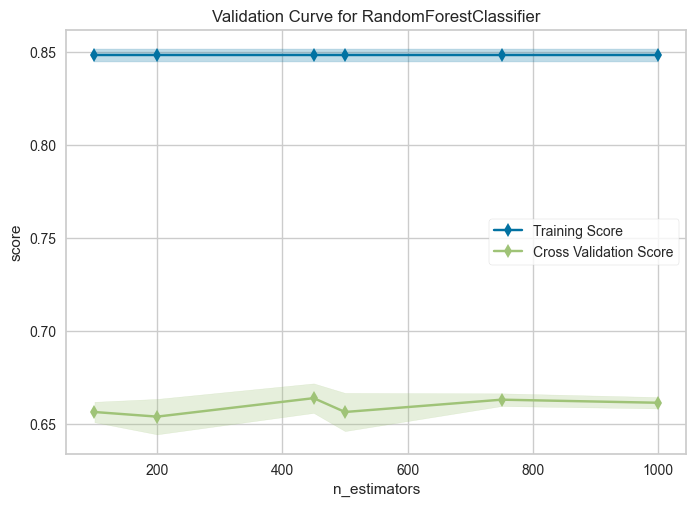

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  750, 1000]),
                scoring='accuracy')


In [25]:
from yellowbrick.model_selection import validation_curve
num_est = [100, 200, 450, 500, 750, 1000]
print(validation_curve(RandomForestClassifier(), X = X_train, y = y_train, param_name = 'n_estimators',param_range = num_est, scoring = 'accuracy', cv = 3))